# Week 8 — Exploratory Data Analysis (EDA)

## Part 1
### Lifestyle and Health Habits Dataset
This notebook was created to practice exploratory data analysis. We will investigate a synthetic dataset on lifestyle and health habits.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel')

### 1. Loading the Dataset

In [2]:
# How to load the file lifestyle_health.csv
df = pd.read_csv('lifestyle_health.csv')
df.head()

Age  Gender  SleepHours  ExerciseDaysPerWeek   BMI Smoker  \
0   56  Female         3.0                    5  22.6     No   
1   46  Female         8.6                    5  24.7     No   
2   32   Other         8.9                    1  29.4     No   
3   60    Male         3.9                    3  27.3     No   
4   25   Other         6.5                    2  15.3     No   

  AlcoholConsumption  FruitServingsPerDay  StressLevel  Cholesterol  \
0                NaN                    2    88.624383   185.176283   
1                NaN                    4    76.090142   154.735095   
2           Moderate                    4    64.789050   162.219270   
3           Moderate                    4    88.402317   228.705440   
4                NaN                    1    67.675752   172.171949   

  HeartDisease  
0           No  
1           No  
2           No  
3           No  
4           No

In [3]:
# Find out how many rows or the size of the dataset


500

### 2. General Information

In [4]:
# Goal: obtain general information about the dataset
# Start getting insights about the data
# info lists the columns, data types, and null values

# Statistical description of the numerical columns


### 3. Checking for Missing Data

In [5]:
# check for nullls in each column

Age                      0
Gender                   0
SleepHours               0
ExerciseDaysPerWeek      0
BMI                      0
Smoker                   0
AlcoholConsumption     238
FruitServingsPerDay      0
StressLevel              0
Cholesterol              0
HeartDisease             0
dtype: int64

In [6]:
# List the rows where AlcoholConsumption is null
df[df['AlcoholConsumption'].isnull()]

Age  Gender  SleepHours  ExerciseDaysPerWeek   BMI Smoker  \
0     56  Female         3.0                    5  22.6     No   
1     46  Female         8.6                    5  24.7     No   
4     25   Other         6.5                    2  15.3     No   
5     38   Other         6.4                    2  25.7     No   
6     56    Male         4.9                    4  25.9    Yes   
..   ...     ...         ...                  ...   ...    ...   
492   45    Male         3.3                    5  24.4     No   
493   49    Male        10.4                    0  27.9     No   
496   41  Female         8.5                    3  24.8     No   
497   29    Male        10.7                    6  20.3    Yes   
499   50  Female         7.8                    2  24.8     No   

    AlcoholConsumption  FruitServingsPerDay  StressLevel  Cholesterol  \
0                  NaN                    2    88.624383   185.176283   
1                  NaN                    4    76.090142   154.735095   
4                  NaN                    1    67.675752   172.171949   
5                  NaN                    2    59.696302   182.730525   
6                  NaN                    0    82.005878   201.988891   
..                 ...                  ...          ...          ...   
492                NaN                    0    86.849374   236.807656   
493                NaN                    0    56.454289   180.296185   
496                NaN                    2    45.809806   148.474504   
497                NaN                    2    37.345337   205.421314   
499                NaN                    2    64.388712   192.425835   

    HeartDisease  
0             No  
1             No  
4             No  
5             No  
6            Yes  
..           ...  
492           No  
493          Yes  
496           No  
497          Yes  
499           No  

[238 rows x 11 columns]

In [7]:
# Does the absence of this data make sense?
# What could have caused these missing values?
# It could be that people who do not consume alcohol did not fill in this information
# Or it could be an error in data collection

### 4. Distribuições Univariadas

In [7]:
# Distribution of numerical variables
# Helps to understand dispersion and identify outliers
num_cols = ['Age', 'SleepHours', 'ExerciseDaysPerWeek', 'BMI', 'FruitServingsPerDay', 'StressLevel', 'Cholesterol']
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [8]:
# Are there any visible outliers?
# Which ones? What should we do with them?

### 5. Relationships Between Variables

In [9]:
df.columns

Index(['Age', 'Gender', 'SleepHours', 'ExerciseDaysPerWeek', 'BMI', 'Smoker',
       'AlcoholConsumption', 'FruitServingsPerDay', 'StressLevel',
       'Cholesterol', 'HeartDisease'],
      dtype='object')

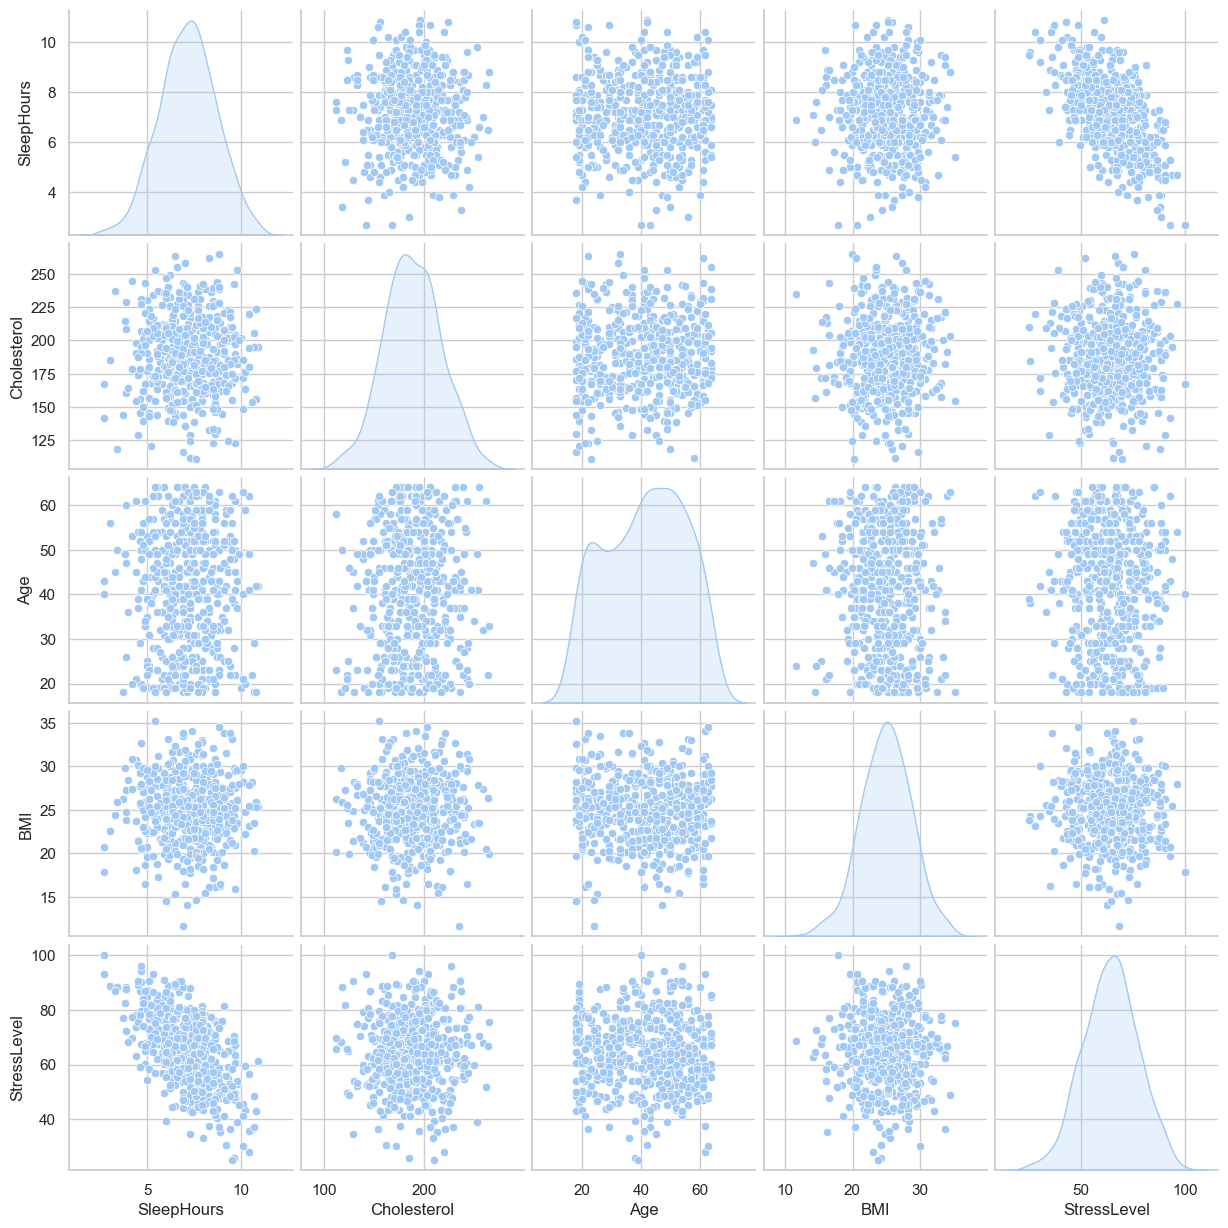

In [10]:
# What is the dataset about?
# Do we have any relationships?
sns.pairplot(df[['SleepHours', 'Cholesterol', 'Age', 'BMI','StressLevel']], diag_kind='kde')


In [11]:
# There is a relationship between stress level and sleep hours
# It is a negative relationship, which means: the more sleep hours, the lower the stress level.

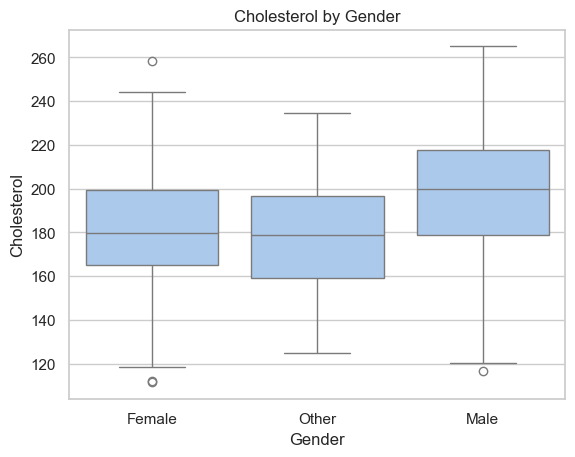

In [12]:
# For categorical variables Gender and Cholesterol
sns.boxplot(x='Gender', y='Cholesterol', data=df)
plt.title('Cholesterol by Gender')
plt.show()


In [13]:
# Do females have higher cholesterol than males?
# How can we confirm this?

### 6. Correlations

In [14]:
# For numerical values
# Correlation matrix

In [15]:
# Confirm the correlation between SleepHours and StressLevel using Spearman and Pearson (coefficient and p-value)
from scipy.stats import pearsonr, spearmanr



In [16]:
# Confirm the correlation between Gender and Cholesterol using the chi-square test
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['Cholesterol'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2}, p-value: {p}')


Chi-square statistic: 1000.0, p-value: 0.4762145859597278


### 7. Relações com Doença Cardíaca

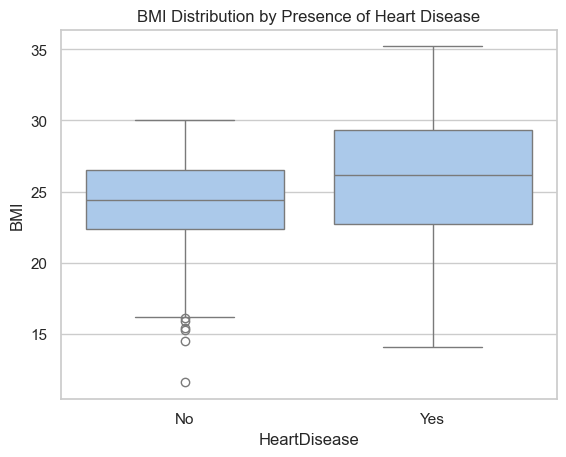

In [17]:
sns.boxplot(x='HeartDisease', y='BMI', data=df)
plt.title('BMI Distribution by Presence of Heart Disease')
plt.show()

In [18]:
# Confirm if there is a relationship between BMI and Heart Disease using a t-test
contingency_table = pd.crosstab(df['BMI'], df['HeartDisease'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}, p-value: {p}')

Chi-square statistic: 197.47685185185185, p-value: 0.005648735548672667


### 8. Storytelling — What Did We Learn?
- We analyzed all the numerical variables in the dataframe and only found a significant relationship between sleep hours and stress level.
- Females seem to have higher cholesterol levels than males, but this needs to be confirmed with more data.
- People with higher BMI appear to have a higher incidence of heart disease.

## Part 2
## House Prices

The goal is to develop the ability to:
- Formulate analytical questions;
- Explore and clean data;
- Create meaningful visualizations;
- Communicate results clearly and with evidence.

### 1. Importing Libraries and Loading the Dataset

In [19]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Open the file kc_house_data.csv
df = pd.read_csv('kc_house_data.csv')
df.head()


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

### 2. Get a general understanding of the loaded dataset. What variables are present? What is the size of the dataset?

### 3. Are there missing values in the dataset? If so, which columns have these values and how many missing values are there in each?

>Tip:
> - Use `df.isnull().sum()` and `df.duplicated().sum()`.
> - Discuss the potential impact of these issues.

### 4. Which numerical variables show the greatest dispersion (difference between Q3 and Q1)?
> - Tip: use `df.describe()` or calculate the IQR (Interquartile Range).
> - Explain why high dispersion can be relevant in a price analysis.

### 5. What is the distribution of house prices? Are there signs of outliers or skewness?
> Tip: use histograms and boxplots

### 6. Is there any outliers in price? Show the dataframe rows with outliers.

### 7. What is the relationship between living area (sqft_living) and price?

### 8. Are houses with more bedrooms always more expensive?

### 9. Do prices vary by region (zipcode)? Identify the 5 most expensive and 5 least expensive zip codes.

### 10. Is there a price appreciation trend with the year of construction (yr_built)?

### 11. Identify possible outliers in price and sqft_living. Should these values be removed or kept? Justify your answer.